# Embedding a 2D circle with t-SNE and UMAP and various initializations

In [ ]:
%matplotlib notebook

import numpy as np
import pylab as plt
import seaborn as sns
sns.set_style('ticks')

from openTSNE import TSNE

# import sys; sys.path.append('../FIt-SNE/')
# from fast_tsne import fast_tsne

from umap import UMAP
import warnings

In [2]:
# Generate the data

n = 7000
np.random.seed(42)
X = np.random.randn(n,3) / 1000
X[:,0] += np.cos(np.arange(n)*2*np.pi/n)
X[:,1] += np.sin(np.arange(n)*2*np.pi/n)

In [3]:
%%time

# BH is faster for this sample size
Z1 = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(X)
Z2 = TSNE(n_jobs=-1, negative_gradient_method='bh').fit(X)

CPU times: user 2min 32s, sys: 1.46 s, total: 2min 34s
Wall time: 21.8 s


In [4]:
%%time

with warnings.catch_warnings():        # Unfortunately still lots of Numba parallel warnings
    warnings.simplefilter('ignore')
    Z3 = UMAP(init='random', random_state=42).fit_transform(X)
    Z4 = UMAP().fit_transform(X)

CPU times: user 1min 16s, sys: 472 ms, total: 1min 16s
Wall time: 32.2 s


<IPython.core.display.Javascript object>


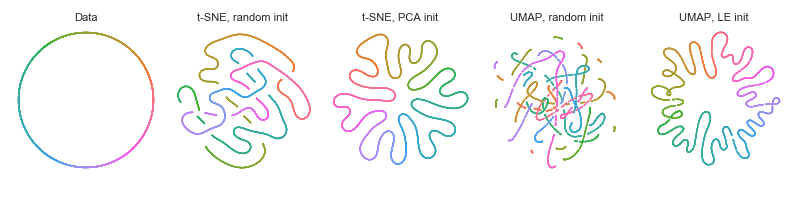

In [5]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(n))

titles = ['Data', 't-SNE, random init', 't-SNE, PCA init', 'UMAP, random init', 'UMAP, LE init']

plt.figure(figsize=(8, 2))
for i,Z in enumerate([X,Z1,Z2,Z3,Z4],1):
    plt.subplot(1,5,i)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=np.arange(n), cmap=cmap, edgecolor='none')
    m = np.max(np.abs(Z)) * 1.05
    plt.xlim([-m, m])
    plt.ylim([-m, m])
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i-1], fontsize=8)
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.savefig('tsne-umap-circle.png', dpi=600)
plt.savefig('tsne-umap-circle.pdf')